In [1]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import shutil
VALIDATION_DIR = "C:/Users/dbs99/Downloads/fire-detection-master1/fire-detection-master/Datasets 1-2/Validation"
TRAINING_DIR  = "C:/Users/dbs99/Downloads/fire-detection-master1/fire-detection-master/Datasets 1-2/Training"

training_datagen = ImageDataGenerator(rescale=1./255,
																			zoom_range=0.15,
																			horizontal_flip=True,
                                      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	shuffle = True,
	class_mode='categorical',
  batch_size = 128
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical',
	shuffle = True,
  batch_size= 128
)

Found 980 images belonging to 2 classes.
Found 239 images belonging to 2 classes.


In [24]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout

input_tensor = Input(shape=(224, 224, 3))

base_model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [25]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss')<=0.1099 and logs.get('loss')<=0.1099):
      print('/n\n Reached The Destination!')
      #self.model.stop_training = True
callbacks = myCallback()

history = model.fit(
    train_generator,
    steps_per_epoch = 14,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 14,
    callbacks=[callbacks]
)

Epoch 1/20
14/14 [==============================] - 90s 5s/step - loss: 9.3833 - acc: 0.6061 - val_loss: 0.2164 - val_acc: 0.9414


In [28]:

for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['acc'])


class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
   print('\n\n End epoch!')
callbacks = myCallback()

history = model.fit(
    train_generator,
    steps_per_epoch = 7,
    epochs = 5,
    validation_data = validation_generator,
    validation_steps = 7,
    callbacks=[callbacks]
)
print(len(base_model.layers))
print(history)

Epoch 1/5
7/7 [==============================] - ETA: 0s - loss: 0.5658 - acc: 0.8016 

 Reached The Destination!
7/7 [==============================] - 91s 12s/step - loss: 0.5658 - acc: 0.8016
Epoch 2/5
7/7 [==============================] - ETA: 0s - loss: 0.5593 - acc: 0.8040 

 Reached The Destination!
7/7 [==============================] - 79s 11s/step - loss: 0.5593 - acc: 0.8040
Epoch 3/5
7/7 [==============================] - ETA: 0s - loss: 0.5497 - acc: 0.7817 

 Reached The Destination!
7/7 [==============================] - 79s 11s/step - loss: 0.5497 - acc: 0.7817
Epoch 4/5
7/7 [==============================] - ETA: 0s - loss: 0.5291 - acc: 0.8069 

 Reached The Destination!
7/7 [==============================] - 71s 10s/step - loss: 0.5291 - acc: 0.8069
Epoch 5/5
7/7 [==============================] - ETA: 0s - loss: 0.5275 - acc: 0.7676 

 Reached The Destination!
7/7 [==============================] - 67s 9s/step - loss: 0.5275 - acc: 0.7676
311


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])
{'loss': [0.6044648289680481, 0.4169583022594452, 0.3299456238746643, 0.26732495427131653, 0.25856757164001465, 0.2327064573764801, 0.1954445242881775], 'acc': [0.6596243977546692, 0.7689732313156128, 0.8708920478820801, 0.8990610241889954, 0.9025821685791016, 0.9107981324195862, 0.9284037351608276], 'val_loss': [0.48774251341819763], 'val_acc': [0.715481162071228]}


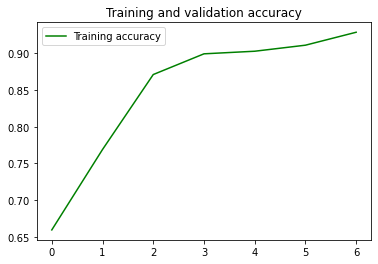

<Figure size 432x288 with 0 Axes>

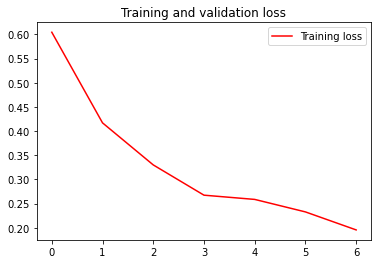

<Figure size 432x288 with 0 Axes>

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
history_dict = history.history
print(history_dict.keys())

acc = history.history['acc']
print(history.history)
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.title('Training and validation accuracy')

plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training and validation loss')

plt.legend(loc=0)
plt.figure()
plt.show()

In [2]:
from tensorflow.keras.optimizers import RMSprop,Adam
#Define the model and selecting features 
model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(224, 224, 3)),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Conv2D(384, (5,5), activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(2048, activation='relu'),
          tf.keras.layers.Dropout(0.25),
          tf.keras.layers.Dense(1024, activation='relu'),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(2, activation='softmax')
])
#Compile model 
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['acc'])
model.summary()

history = model.fit(
    train_generator,
    steps_per_epoch =7,
    epochs = 7,
    validation_data = validation_generator,
    validation_steps =7
    #callbacks=[callbacks]
)
model.save("./model/rps.h5")

%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
print(acc)
print(val_acc)
print(loss)
print(val_loss)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 384)         2457984   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 384)        0

d:\Users\dbs99\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/7
7/7 [==============================] - 70s 10s/step - loss: 0.6048 - acc: 0.6796 - val_loss: 0.5164 - val_acc: 0.7155
Epoch 2/7
7/7 [==============================] - 53s 8s/step - loss: 0.4274 - acc: 0.7701
Epoch 3/7
7/7 [==============================] - 49s 7s/step - loss: 0.3268 - acc: 0.8815
Epoch 4/7
7/7 [==============================] - 47s 6s/step - loss: 0.2970 - acc: 0.8721
Epoch 5/7
7/7 [==============================] - 48s 7s/step - loss: 0.3006 - acc: 0.8744
Epoch 6/7
7/7 [==============================] - 48s 7s/step - loss: 0.2611 - acc: 0.8991
Epoch 7/7
7/7 [==============================] - 50s 7s/step - loss: 0.2499 - acc: 0.9062
[0.6795774698257446, 0.7700892686843872, 0.8814554214477539, 0.8720657229423523, 0.8744131326675415, 0.8990610241889954, 0.90625]
[0.715481162071228]
[0.6048217415809631, 0.42742469906806946, 0.3267787992954254, 0.2969776391983032, 0.30063924193382263, 0.26110318303108215, 0.24985840916633606]
[0.5163612365722656]


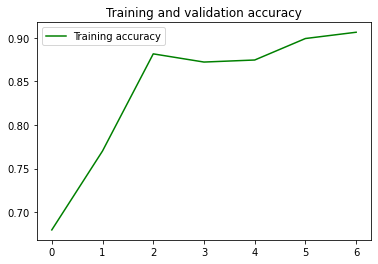

<Figure size 432x288 with 0 Axes>

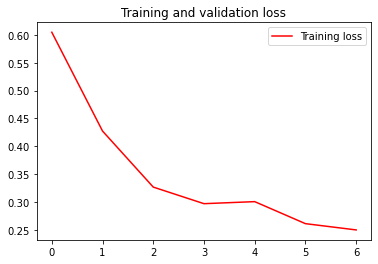

<Figure size 432x288 with 0 Axes>

In [3]:
plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.title('Training and validation accuracy')

plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training and validation loss')

plt.legend(loc=0)
plt.figure()
plt.show()